# Tugas

## Tugas 1

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data `spam.csv`
2. Fitur `CountVectorizer` dengan mengaktifkan **stop_words**
3. Evaluasi hasilnya

## Tugas 2

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data `spam.csv`
2. Fitur `TF-IDF` dengan mengaktifkan **stop_words**
3. Evaluasi hasilnya dan bandingkan dengan hasil tugas 1.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

In [15]:
#import library yang akan dipakai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


UNDERSTANDING DATASET

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


DATA CLEANING

In [6]:
#drop column yang tidak dipakai
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#ubah nama column agar lebih deskriptif
df.rename(columns = {'v1' : 'label', 'v2' : 'sms'}, inplace = True)
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Cek Jumlah Data Per Kelas
print(df['label'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

ham     4825
spam     747
Name: label, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       label                     sms
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [9]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['label'] = df['label'].map(new_labels)

# Cek data
df.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#apakah masih ada data yang kosong
df.isna().sum()

label    0
sms      0
dtype: int64

In [11]:
#cek apakah ada data yang sama
df.duplicated().sum()

403

In [12]:
#karena ada data yang sama, bersihkan terlebih dahulu
df = df.drop_duplicates(keep = 'first')
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


EXPLORATORY DATA ANALYSIS

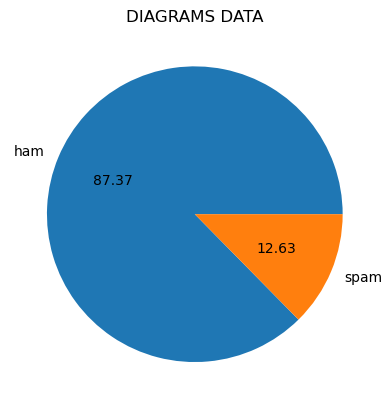

In [13]:
plt.pie(df['label'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.title('DIAGRAMS DATA')
plt.show()

Ternyata dalam dataset tersebut, jumlah data spam dan ham tidak seimbang

In [14]:
#pisahkan fitur dan label
X = df['sms'].values
y = df['label'].values
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [18]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

<h1> TUGAS 1

EKSTRAKSI FITUR

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


# Inisiasi CountVectorizer
bow = CountVectorizer(
    lowercase = True,
    stop_words = 'english'
)

# Fitting dan transform X_train dengan CountVectorizer
X_train_1 = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test_1 = bow.transform(X_test)

TRAINING DAN EVALUASI

In [24]:
# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train_1, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train_1)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test_1)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946795646916566
Hasil akurasi data test: 0.9893617021276596


<h1> TUGAS 2


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisiasi CountVectorizer
vectorizer = TfidfVectorizer(
    lowercase = True,
    stop_words = 'english'
)

# Fitting dan transform X_train dengan CountVectorizer
X_train_2 = vectorizer.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test_2 = vectorizer.transform(X_test)

In [27]:
# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train_2, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train_2)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test_2)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9799274486094317
Hasil akurasi data test: 0.9661508704061895


Evaluasi dari penggunaan fitur `countVectorizer` dan `TFidfVectorizer` adalah sebagai berikut :
1. Hasil akurasi model dari penggunaan kedua fitur menyatakan bahwa `countVectorizer` memiliki hasil yang lebih tinggi dibandingkan `TfidfVectorizer`
2. Meski hasil akurasi `countVectorizer` lebih tinggi, angka akurasi pada data trainnya hampir menyentuh angka 100% yang mana model tersebut dapat dikatakan overfitting.
3. Menurut yang saya pelajari, model dapat dikatakan good fit yaitu memiliki akurasi pada data train dan data test di angka 98%.
4. Jadi, penggunaan ekstrasi fitur yang tepat untuk dataset `spam.csv` adalah `TfidfVectorizer` karena akurasi model yang diperoleh bisa dianggap good fit.